# Housing Pricing Prediction
https://www.kaggle.com/competitions/home-data-for-ml-course/overview

Let's try to find a good model to predict the price of houses using best practices.

First let's load our csvs:

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## Now let's explore our data

1. **Basic Statistics** - Shape, data types, missing values, basic stats

In [2]:
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("\nFirst few rows of training data:")
train_df.head()

Training data shape: (1460, 81)
Test data shape: (1459, 80)

First few rows of training data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. **Target Variable Analysis** - Distribution of what we're predicting

=== TARGET VARIABLE ANALYSIS ===
Target variable: SalePrice
Mean: $180,921.20
Median: $163,000.00
Min: $34,900.00
Max: $755,000.00


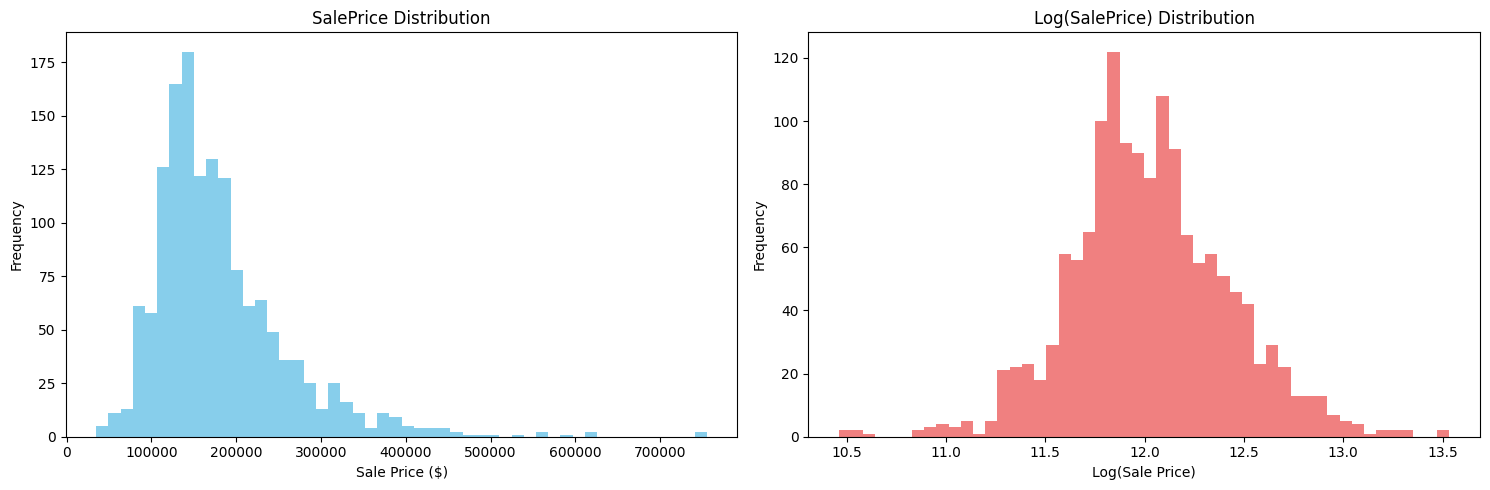

In [3]:
# 2. Target Variable Analysis (SalePrice)
import matplotlib.pyplot as plt

print("=== TARGET VARIABLE ANALYSIS ===")
print(f"Target variable: SalePrice")
print(f"Mean: ${train_df['SalePrice'].mean():,.2f}")
print(f"Median: ${train_df['SalePrice'].median():,.2f}")
print(f"Min: ${train_df['SalePrice'].min():,.2f}")
print(f"Max: ${train_df['SalePrice'].max():,.2f}")

# Plot target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(train_df['SalePrice'], bins=50, color='skyblue')
axes[0].set_title('SalePrice Distribution')
axes[0].set_xlabel('Sale Price ($)')
axes[0].set_ylabel('Frequency')

# Log-transformed histogram (often more normal for prices)
axes[1].hist(np.log(train_df['SalePrice']), bins=50, color='lightcoral')
axes[1].set_title('Log(SalePrice) Distribution')
axes[1].set_xlabel('Log(Sale Price)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== MISSING DATA ANALYSIS ===
Columns with missing data: 19

Top 10 columns with most missing values:
PoolQC: 1453 (99.5%)
MiscFeature: 1406 (96.3%)
Alley: 1369 (93.8%)
Fence: 1179 (80.8%)
MasVnrType: 872 (59.7%)
FireplaceQu: 690 (47.3%)
LotFrontage: 259 (17.7%)
GarageType: 81 (5.5%)
GarageYrBlt: 81 (5.5%)
GarageFinish: 81 (5.5%)


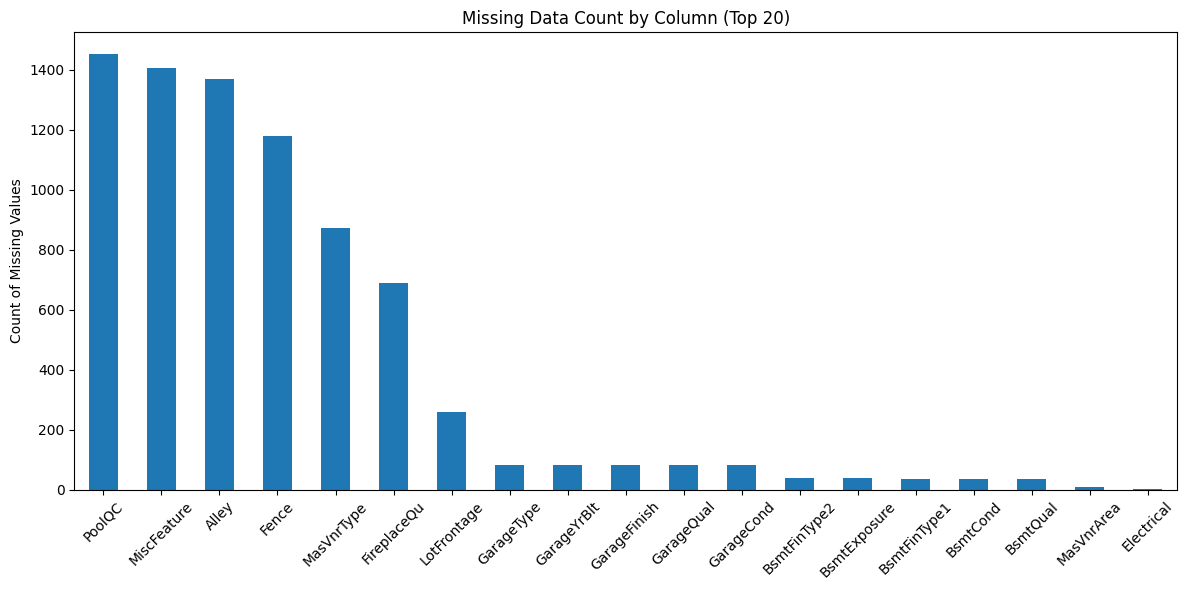

In [4]:
# 3. Missing Data Analysis
print("=== MISSING DATA ANALYSIS ===")
missing_data = train_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    print(f"Columns with missing data: {len(missing_data)}")
    print("\nTop 10 columns with most missing values:")
    for col, count in missing_data.head(10).items():
        percentage = (count / len(train_df)) * 100
        print(f"{col}: {count} ({percentage:.1f}%)")
    
    # Visualize missing data
    if len(missing_data) > 0:
        plt.figure(figsize=(12, 6))
        missing_data.head(20).plot(kind='bar')
        plt.title('Missing Data Count by Column (Top 20)')
        plt.ylabel('Count of Missing Values')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No missing data found!")

3. **Feature Analysis** - Understanding each feature type and distribution

In [5]:
# 4. Feature Analysis by Data Type
print("=== FEATURE ANALYSIS ===")

# Separate columns by type
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from numeric columns if present
if 'SalePrice' in numeric_columns:
    numeric_columns.remove('SalePrice')

print(f"Numeric features: {len(numeric_columns)}")
print(f"Categorical features: {len(categorical_columns)}")

# Show first few of each type
print(f"\nFirst 10 numeric columns: {numeric_columns[:10]}")
print(f"First 10 categorical columns: {categorical_columns[:10]}")

# Categorical data analysis
print("\n=== CATEGORICAL FEATURE ANALYSIS ===")
for col in categorical_columns[:5]:  # Show first 5 categorical columns
    unique_count = train_df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:  # Show values if not too many
        print(f"  Values: {train_df[col].unique()}")
    print(f"  Most common: {train_df[col].mode().iloc[0] if not train_df[col].mode().empty else 'N/A'}")
    print()

=== FEATURE ANALYSIS ===
Numeric features: 37
Categorical features: 43

First 10 numeric columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']
First 10 categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']

=== CATEGORICAL FEATURE ANALYSIS ===
MSZoning: 5 unique values
  Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
  Most common: RL

Street: 2 unique values
  Values: ['Pave' 'Grvl']
  Most common: Pave

Alley: 2 unique values
  Values: [nan 'Grvl' 'Pave']
  Most common: Grvl

LotShape: 4 unique values
  Values: ['Reg' 'IR1' 'IR2' 'IR3']
  Most common: Reg

LandContour: 4 unique values
  Values: ['Lvl' 'Bnk' 'Low' 'HLS']
  Most common: Lvl



**Correlation Analysis** - How features relate to each other and the target

=== CORRELATION ANALYSIS ===
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAb

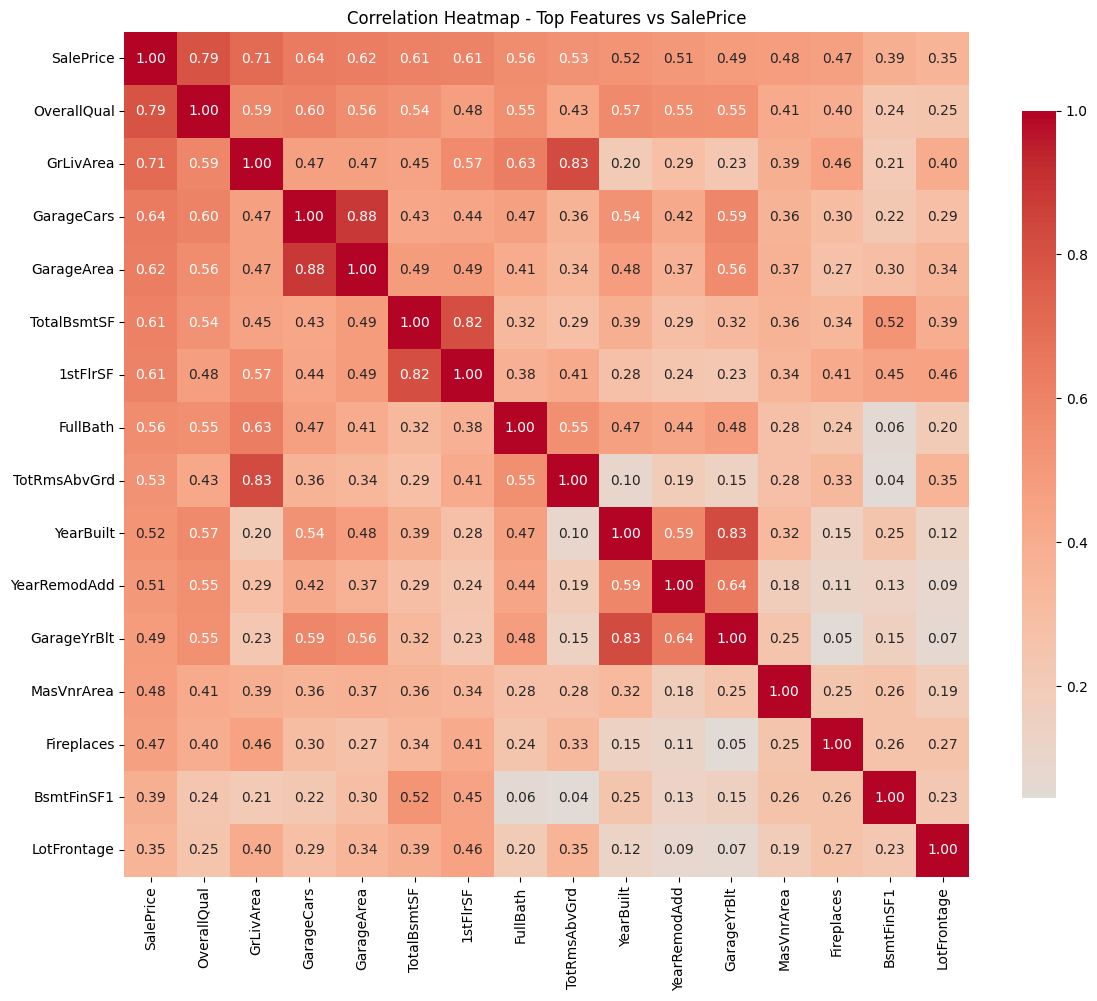

In [7]:
import seaborn as sns
# 5. Correlation Analysis - The Most Important for ML
print("=== CORRELATION ANALYSIS ===")

# Get correlations with target variable
numeric_df = train_df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

print(correlations)

# Plot correlation heatmap for top features
top_features = correlations.head(16).index  # Top 15 + SalePrice itself
top_corr_matrix = numeric_df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Top Features vs SalePrice')
plt.tight_layout()
plt.show()

=== ADVANCED VISUALIZATIONS ===


=== ADVANCED VISUALIZATIONS ===


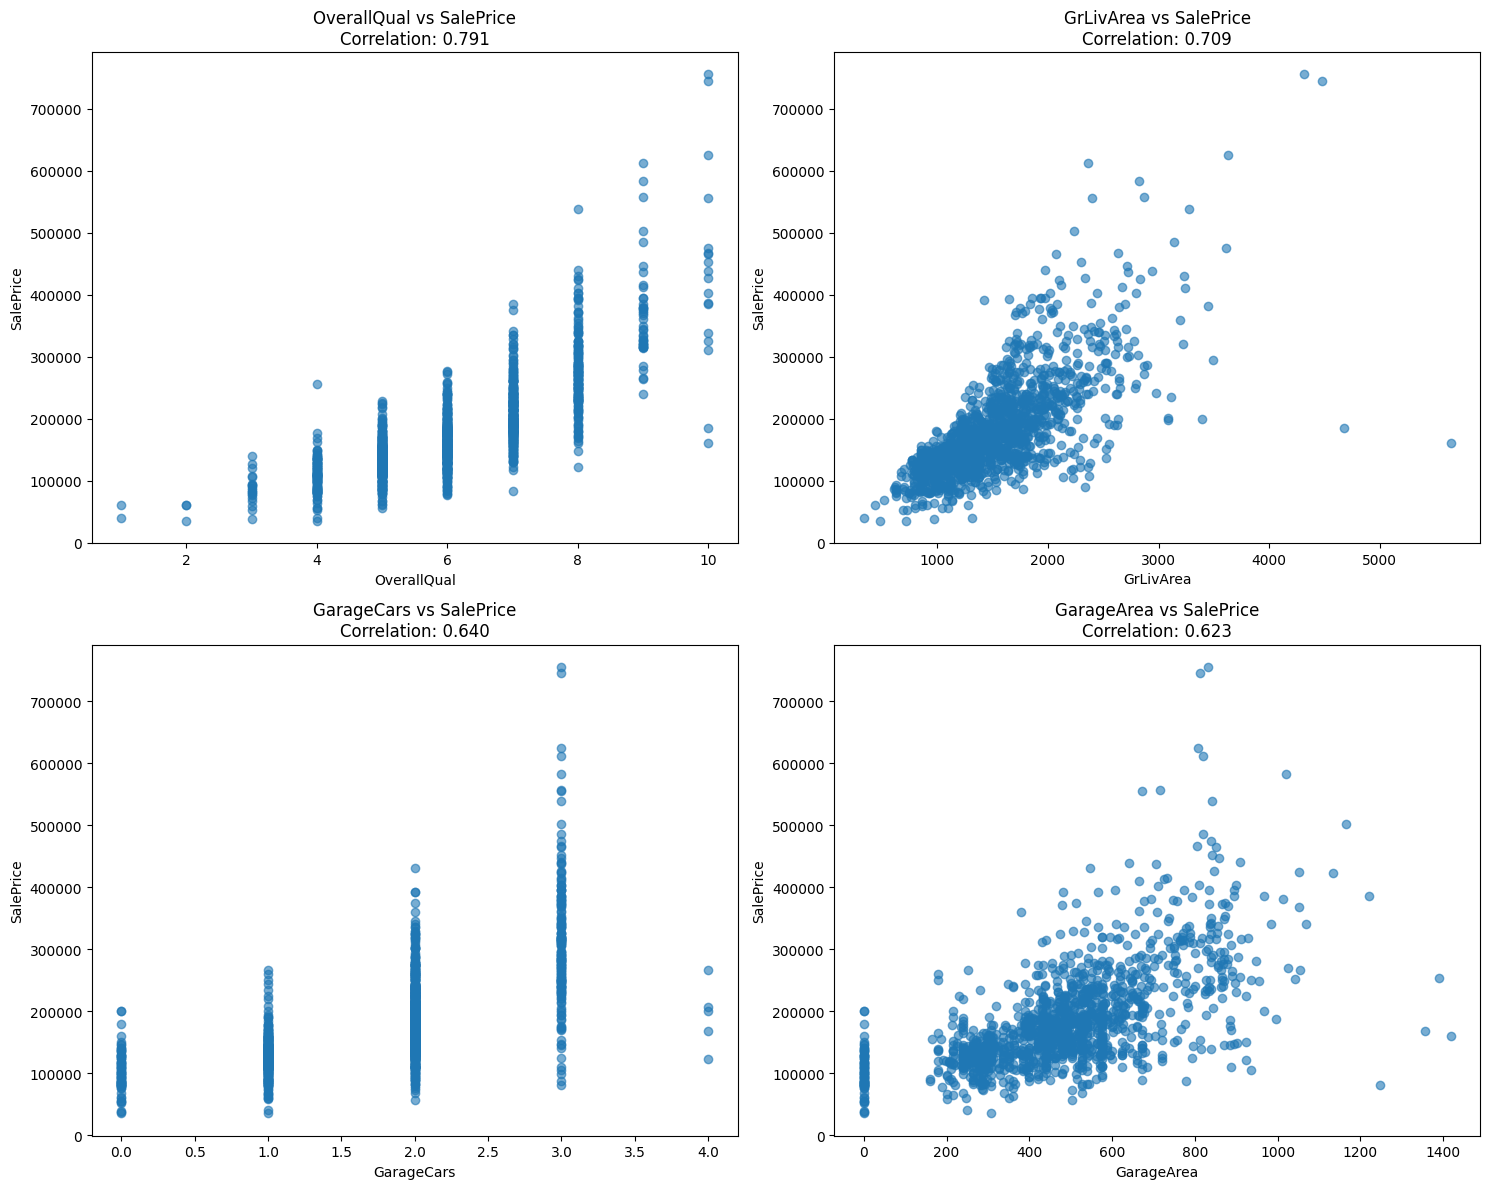

=== ADVANCED VISUALIZATIONS ===


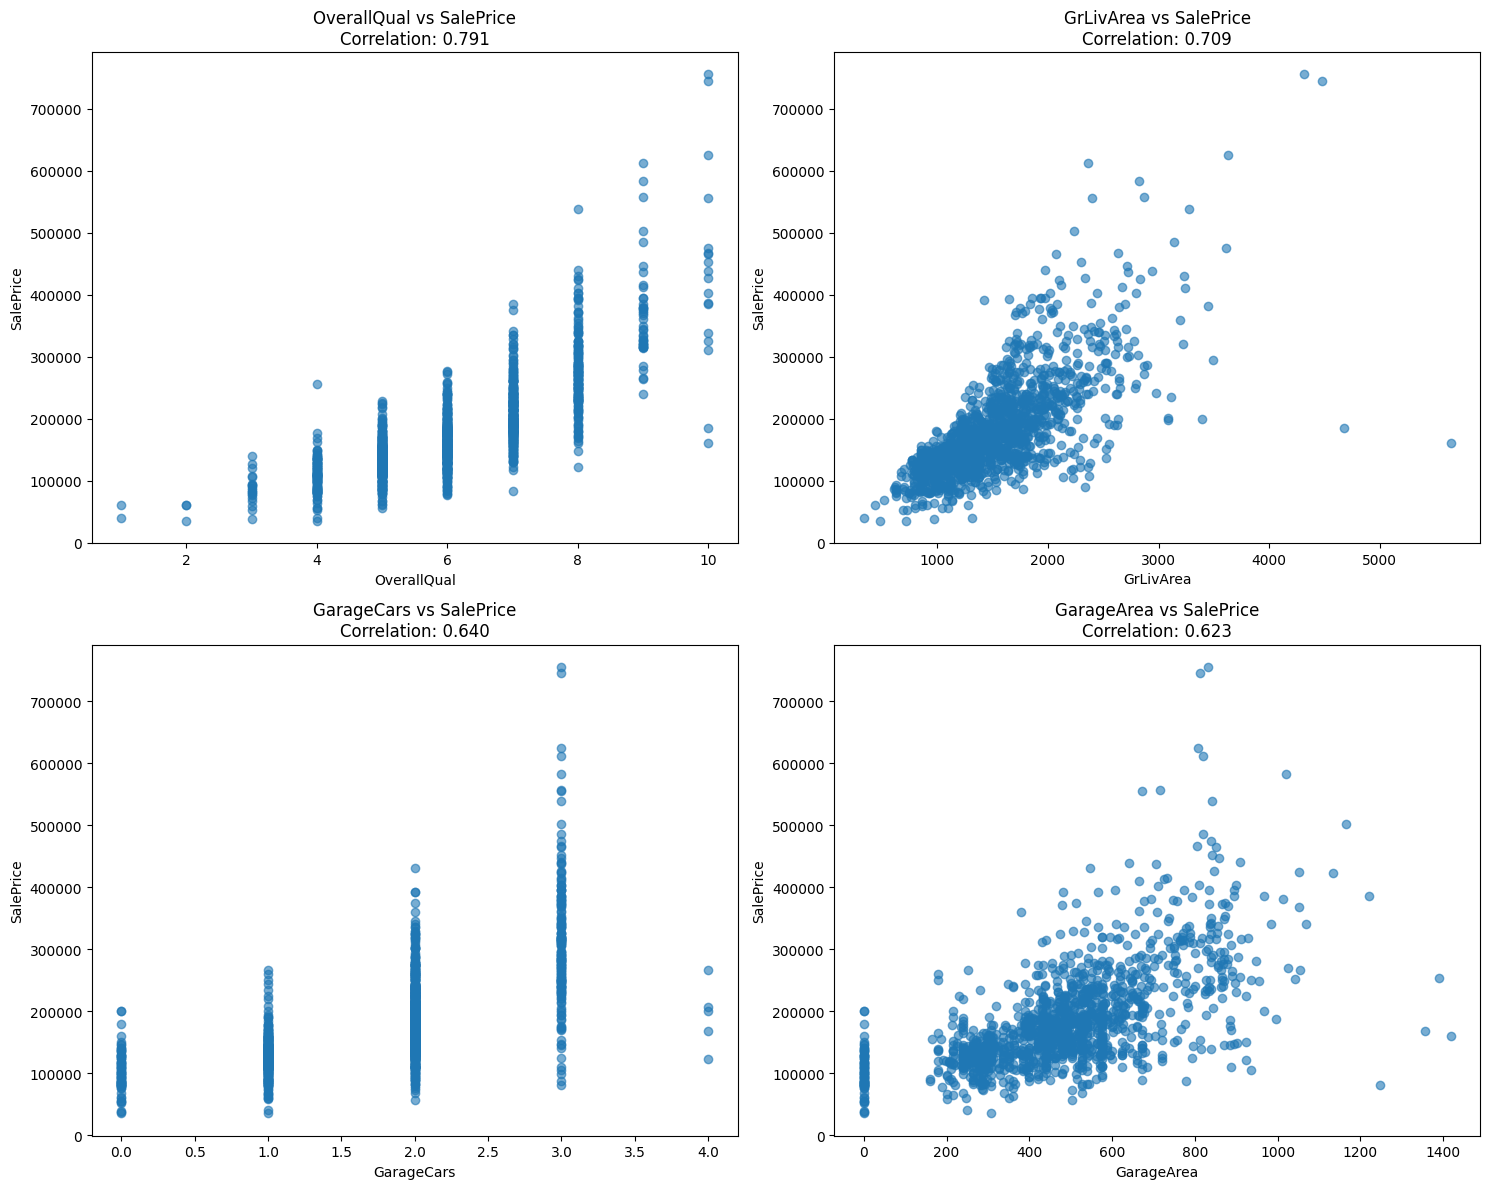

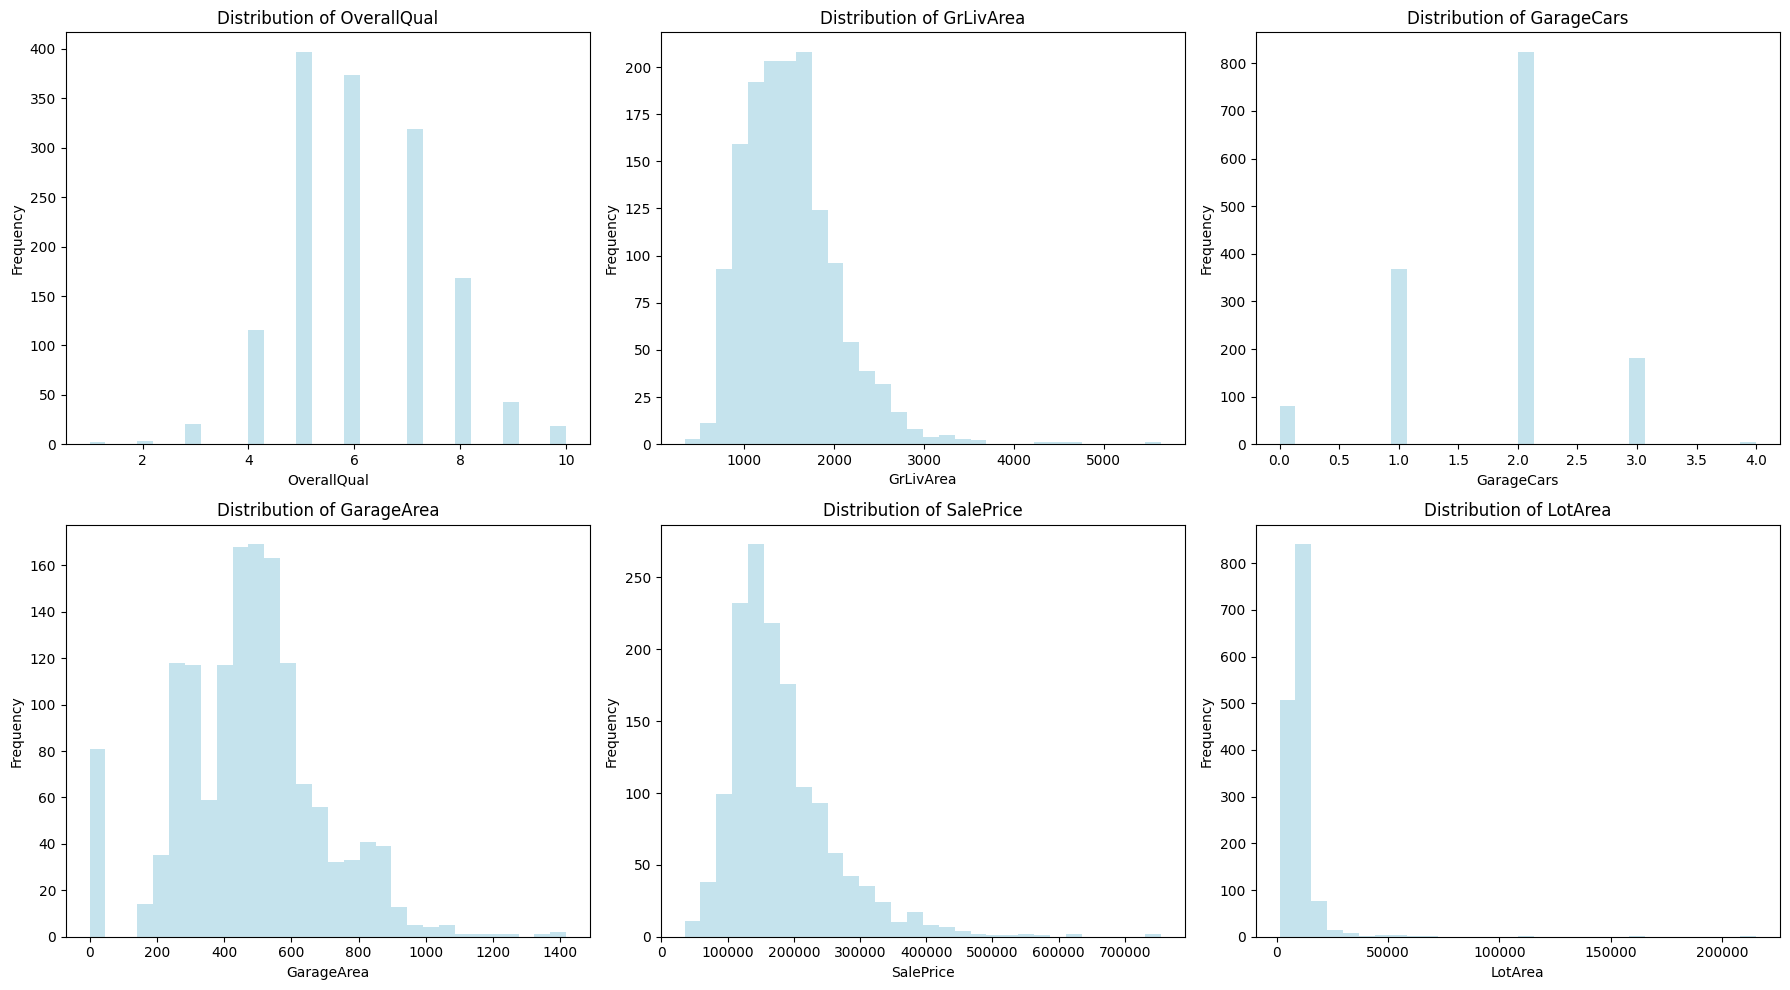

In [ ]:
# 6. Advanced Visualizations for High-Dimensional Data
print("=== ADVANCED VISUALIZATIONS ===")

# A. Scatter plots of top correlated features
top_numeric_features = correlations.abs().sort_values(ascending=False).head(6).index
top_numeric_features = [f for f in top_numeric_features if f != 'SalePrice'][:4]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(top_numeric_features):
    axes[i].scatter(train_df[feature], train_df['SalePrice'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{feature} vs SalePrice\nCorrelation: {correlations[feature]:.3f}')

plt.tight_layout()
plt.show()

# B. Distribution plots for key numeric features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

key_features = top_numeric_features + ['SalePrice', 'LotArea']

for i, feature in enumerate(key_features):
    if i < 6:
        axes[i].hist(train_df[feature].dropna(), bins=30, alpha=0.7, color='lightblue')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()